In [2]:
import pandas as pd

1. Load the dataset and display the first five rows
In this case, it is helpful to show the first 5 rows of the DataFrame by default (or a specified number of rows).    I found it Useful for quickly inspecting the dataset structure, column names, and data types

In [3]:
df = pd. read_csv(r"C:\Users\cex\Desktop\Data sets\Project.csv")
df.head()

,Employee_ID,Age,Gender,Education_Level,Work_Experience,Job_Title,Department,Monthly_Salary,Performance_Score,Remote_Work_Percentage,City
0,1001,50,Male,Bachelor,9,Manager,Marketing,80000,8,25,Nakuru
1,1002,36,Female,Bachelor,16,Data Scientist,Operations,69000,9,25,Eldoret
2,1003,29,Female,Bachelor,9,Analyst,Marketing,48000,3,0,Kisumu
3,1004,42,Female,Bachelor,16,Consultant,Finance,91000,10,0,Kisumu
4,1005,40,Female,Bachelor,19,Manager,Finance,64000,3,25,Nairobi


2. Check for missing values. If any exist, suggest how to handle them
I applied df.isnull().sum() 

In [5]:
print(df.isnull().sum())

Employee_ID               0
Age                       0
Gender                    0
Education_Level           0
Work_Experience           0
Job_Title                 0
Department                0
Monthly_Salary            0
Performance_Score         0
Remote_Work_Percentage    0
City                      0
dtype: int64


Inference: Based on the above, there are no missing values in the dataset, so no handling is needed. If missing values existed, we could use strategies like:
1. Filling with mean/median (for numerical data)
2. Filling with mode (for categorical data)
3. Dropping rows with too many missing values

3. Are there duplicate records? If so, remove them.

In [8]:
print(df.duplicated().sum())

0


Inference: 
No duplicate records in the dataset, so no removal is necessary.
If duplicates existed,
we would use .drop_duplicates() to remove them.

4. Convert categorical variables (e.g., Job Title, Education Level) into a format suitable for analysis.
So its best to use df.info() to check the data types

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Employee_ID             200 non-null    int64 
 1   Age                     200 non-null    int64 
 2   Gender                  200 non-null    object
 3   Education_Level         200 non-null    object
 4   Work_Experience         200 non-null    int64 
 5   Job_Title               200 non-null    object
 6   Department              200 non-null    object
 7   Monthly_Salary          200 non-null    int64 
 8   Performance_Score       200 non-null    int64 
 9   Remote_Work_Percentage  200 non-null    int64 
 10  City                    200 non-null    object
dtypes: int64(6), object(5)
memory usage: 17.3+ KB
None


In [12]:
# Convert categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Job_Title', 'Education_Level', 'Gender', 'Department', 'City'], drop_first=True)

# Display the first few rows of the transformed dataset
df_encoded.head()


,Employee_ID,Age,Work_Experience,Monthly_Salary,Performance_Score,Remote_Work_Percentage,Job_Title_Consultant,Job_Title_Data Scientist,Job_Title_Engineer,Job_Title_Manager,...,Gender_Male,Gender_Other,Department_HR,Department_IT,Department_Marketing,Department_Operations,City_Kisumu,City_Mombasa,City_Nairobi,City_Nakuru
0,1001,50,9,80000,8,25,False,False,False,True,...,True,False,False,False,True,False,False,False,False,True
1,1002,36,16,69000,9,25,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2,1003,29,9,48000,3,0,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
3,1004,42,16,91000,10,0,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,1005,40,19,64000,3,25,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


The function pd.get_dummies() automatically transforms categorical variables into numerical dummy variables.
The columns=['Job_Title', 'Education_Level', 'Gender', 'Department', 'City'] argument specifies which categorical columns should be transformed.
This argument removes one category per column to prevent redundancy (dummy variable trap).

inference: 
After applying the transformation,
df_encoded will contain only numerical values,
making it ready for analysis.

In [13]:
print(df_encoded.head())

   Employee_ID  Age  Work_Experience  Monthly_Salary  Performance_Score  \
0         1001   50                9           80000                  8   
1         1002   36               16           69000                  9   
2         1003   29                9           48000                  3   
3         1004   42               16           91000                 10   
4         1005   40               19           64000                  3   

   Remote_Work_Percentage  Job_Title_Consultant  Job_Title_Data Scientist  \
0                      25                 False                     False   
1                      25                 False                      True   
2                       0                 False                     False   
3                       0                  True                     False   
4                      25                 False                     False   

   Job_Title_Engineer  Job_Title_Manager  ...  Gender_Male  Gender_Other  \
0         

inferences by running print(df_encode.head()
first five rows of your dataset after one-hot encoding. The categorical variables (like Job_Title, Education_Level, Gender, Department, and City) will have been converted into multiple new binary columns. as shown above     Each category in Job_Title now has its own column (e.g., Job_Title_Analyst, Job_Title_Engineer).
    The Gender_Female column was removed because drop_first=True, so Gender_Male = 0 implies the employee is Female.
    Department is now multiple columns (Department_Finance, Department_IT, Department_Marketing).

This ensures that all categorical data is now represented numerically for analysis.

5.	Identify and handle any outliers in the Monthly Salary column.

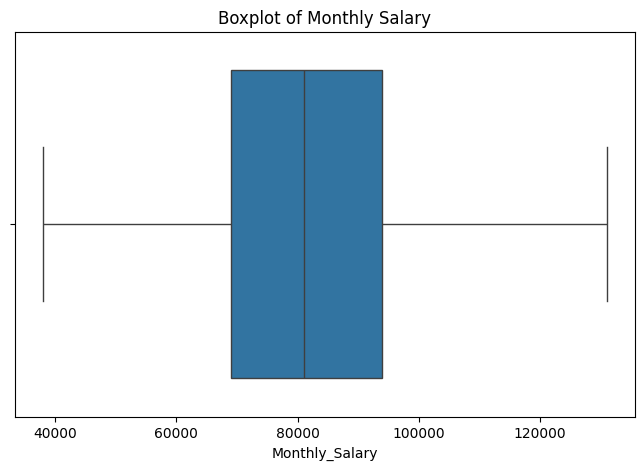

0

In [14]:
#import relevant libraries for visualization 
import seaborn as sns
import matplotlib.pyplot as plt
# Boxplot to visualize outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Monthly_Salary"])
plt.title("Boxplot of Monthly Salary")
plt.show()
# Detect outliers using the IQR method
Q1 = df["Monthly_Salary"].quantile(0.25)
Q3 = df["Monthly_Salary"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df["Monthly_Salary"] >= lower_bound) & (df["Monthly_Salary"] <= upper_bound)]

# Display the number of removed outliers
outliers_removed = df.shape[0] - df_no_outliers.shape[0]
outliers_removed

The box plot does not show any extreme outliers in the Monthly Salary column, and no records were removed based on the IQR method

6. What is the average salary per department? Show this using a bar chart

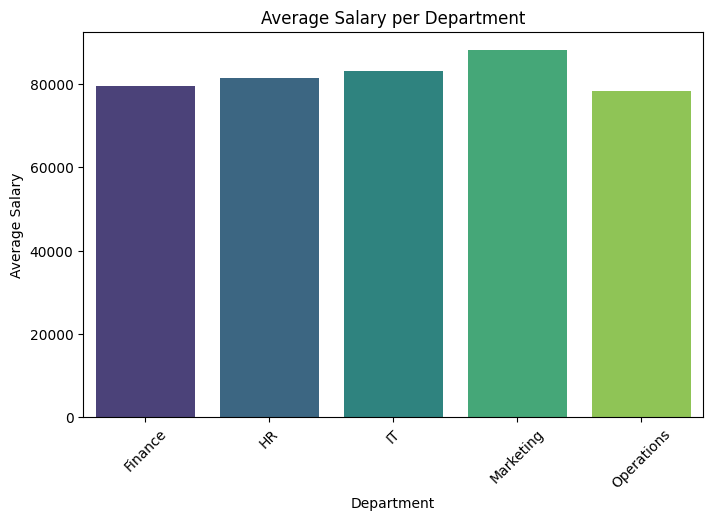

In [16]:
# Calculate average salary per department
avg_salary_per_department = df.groupby("Department")["Monthly_Salary"].mean()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_salary_per_department.index, y=avg_salary_per_department.values, hue=avg_salary_per_department.index, palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.ylabel("Average Salary")
plt.title("Average Salary per Department")
plt.show()

7.	How does education level affect salary? Create a visualization to support your answer

C:\Users\cex\AppData\Local\Temp\ipykernel_28008\501374473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Education_Level"], y=df["Monthly_Salary"], palette="coolwarm")


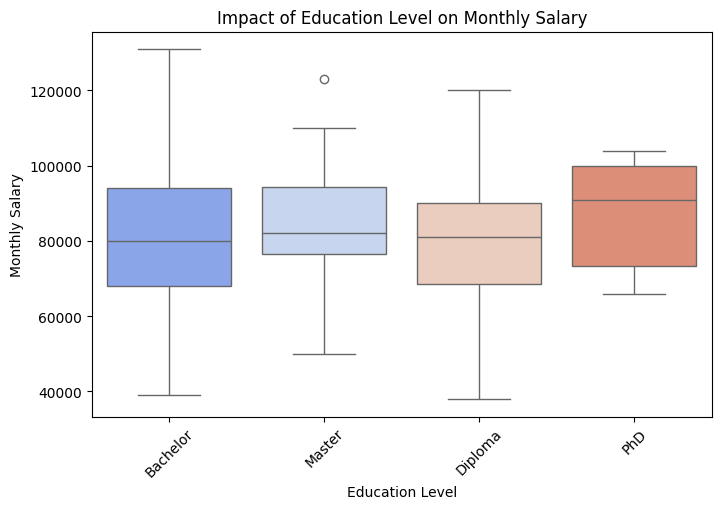

In [17]:
# Boxplot to show the distribution of salary across different education levels
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Education_Level"], y=df["Monthly_Salary"], palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Education Level")
plt.ylabel("Monthly Salary")
plt.title("Impact of Education Level on Monthly Salary")
plt.show()


Higher education levels might have higher median salaries based on the box plot. However, I will use statistics to further demonstrate this on average salary per level of education 

In [18]:
# Calculate average salary per education level
avg_salary_per_edu = df.groupby("Education_Level")["Monthly_Salary"].mean().sort_values()

# Display the results
avg_salary_per_edu


Education_Level
Diploma     80418.604651
Bachelor    80917.431193
Master      84111.111111
PhD         87333.333333
Name: Monthly_Salary, dtype: float64

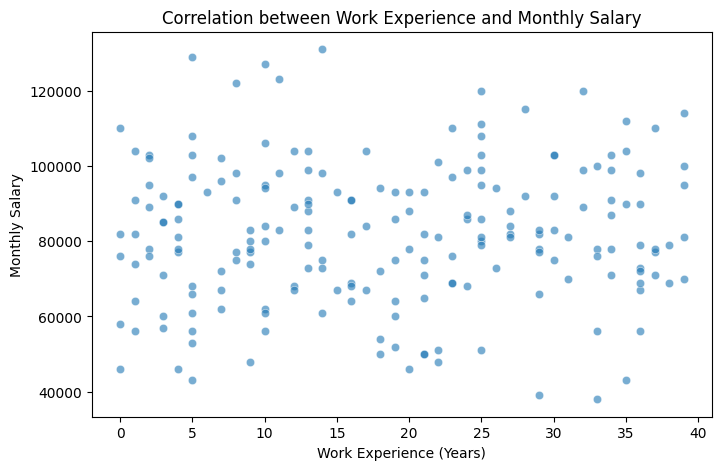

In [19]:
# Scatter plot to visualize correlation between Work Experience and Monthly Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Work_Experience"], y=df["Monthly_Salary"], alpha=0.6)
plt.xlabel("Work Experience (Years)")
plt.ylabel("Monthly Salary")
plt.title("Correlation between Work Experience and Monthly Salary")
plt.show()


Based on the above, it is not easy to tell the correlation visually.
I will perform calculation for correlation coefficienty between work experience and monthly salary

In [20]:
# Calculate the correlation coefficient between Work Experience and Monthly Salary
correlation = df["Work_Experience"].corr(df["Monthly_Salary"])
print(correlation)


0.04715713330357493


Inference on above:
The correlation is 0.047, meaning it's close to 0. 
It means there is no linear relationship between the two variables

9.	Does gender impact salary? Compare average salaries for each gender

In [21]:
# Calculate average salary by gender
avg_salary_by_gender = df.groupby("Gender")["Monthly_Salary"].mean()
# Display the results
print(avg_salary_by_gender)


Gender
Female    83239.130435
Male      79229.166667
Other     90833.333333
Name: Monthly_Salary, dtype: float64


Inference
individuals in the "Other" category have the highest salaries
followed by females, then males

In [22]:
# Calculate the average Remote_Work_Percentage for each department
remote_work_by_department = df.groupby("Department")["Remote_Work_Percentage"].mean().sort_values(ascending=False)

# Display the department with the highest remote work proportion
highest_remote_department = remote_work_by_department.idxmax()
highest_remote_percentage = remote_work_by_department.max()

print(highest_remote_department, highest_remote_percentage)


Finance 27.5


The Finance department has the highest proportion of remote workers at 27.5%

11.	Perform ANOVA to test : 
i. Whether work experience influences the salary amount for the 	employees.
ii. Whether education level influences the salary amount for 	the 	employees.
iii. The interaction effect for Education Level and Work 	Experience 	on the salary.

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# One-way ANOVA: Work Experience vs Salary
anova_work_exp = smf.ols('Monthly_Salary ~ Work_Experience', data=df).fit()
anova_work_exp_result = sm.stats.anova_lm(anova_work_exp, typ=2)

# One-way ANOVA: Education Level vs Salary
anova_edu_level = smf.ols('Monthly_Salary ~ C(Education_Level)', data=df).fit()
anova_edu_level_result = sm.stats.anova_lm(anova_edu_level, typ=2)

# Two-way ANOVA: Interaction of Education Level and Work Experience on Salary
anova_interaction = smf.ols('Monthly_Salary ~ C(Education_Level) * Work_Experience', data=df).fit()
anova_interaction_result = sm.stats.anova_lm(anova_interaction, typ=2)

print(anova_work_exp_result, anova_edu_level_result, anova_interaction_result)


                       sum_sq     df         F    PR(>F)
Work_Experience  1.536763e+08    1.0  0.441293  0.507272
Residual         6.895174e+10  198.0       NaN       NaN                           sum_sq     df         F    PR(>F)
C(Education_Level)  7.264758e+08    3.0  0.694118  0.556653
Residual            6.837894e+10  196.0       NaN       NaN                                           sum_sq     df         F    PR(>F)
C(Education_Level)                  7.023050e+08    3.0  0.659113  0.578168
Work_Experience                     1.295055e+08    1.0  0.364623  0.546663
C(Education_Level):Work_Experience  5.553953e+07    3.0  0.052124  0.984255
Residual                            6.819390e+10  192.0       NaN       NaN


Inferences

The ANOVA results indicate that neither work experience, education level, nor their interaction has a statistically significant effect on salary in this dataset. This means that differences in salaries cannot be explained solely by an employee's years of experience or educational qualifications.

Other factors, such as job title, department, performance scores, or negotiation skills, might have a stronger influence on salary levels. HR and management should explore these variables further to understand what truly determines salary differences and ensure fair compensation policies

12.	Create a box plot showing salary distributions across different job titles

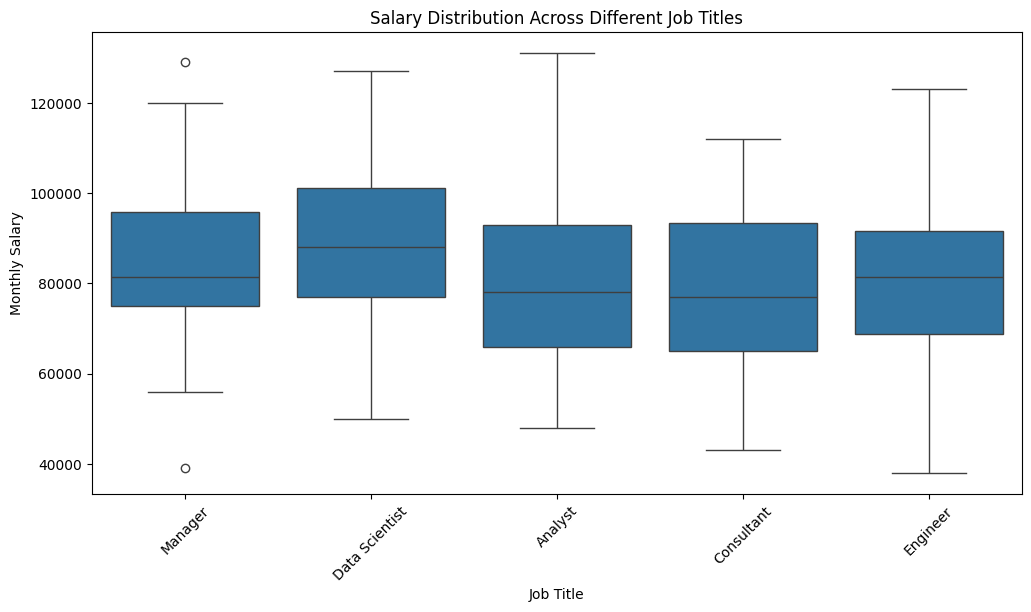

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Job_Title", y="Monthly_Salary", data=df)
plt.xticks(rotation=45)
plt.xlabel("Job Title")
plt.ylabel("Monthly Salary")
plt.title("Salary Distribution Across Different Job Titles")
plt.show()


13.	Develop a heatmap to visualize correlations among numeric variables

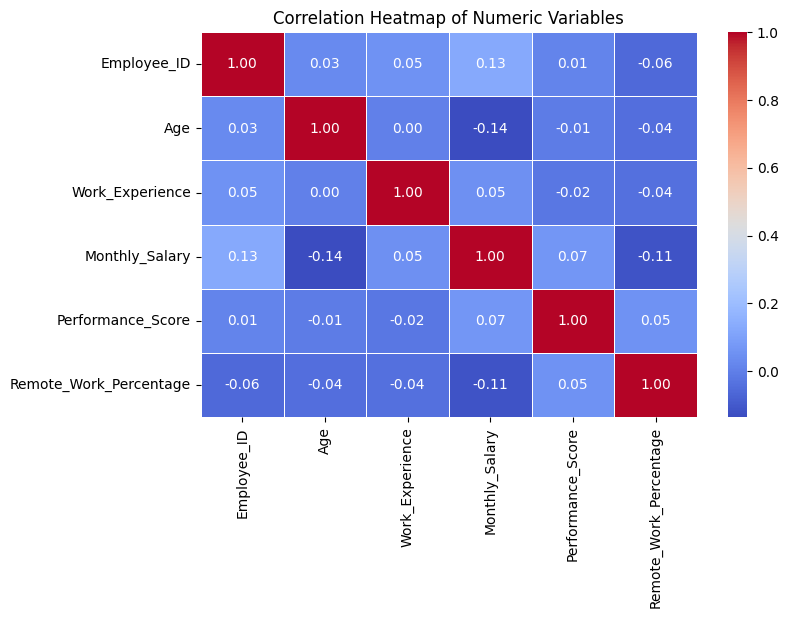

In [27]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()


15.	What insights can HR use to improve salary structures and hiring policies?


In [ ]:
HR Insights for Improving Salary Structures:b Titles and Roles: Consider reviewing salary policies for different job roles, as Data Scientists and Managers seem to earn more.
    Gender Pay Equity: The negative coefficient for males suggests an inverse pay gap, which HR should investigate to ensure fairness.
    Remote Work Compensation: If remote work is negatively affecting salaries, HR may need to revise policies to ensure fair pay adjustments for remote employees.
    Education and Experience: These do not significantly impact salary in this dataset, indicating that promotions and salary increments may not be strictly merit-based.